# Explanation - Shap

In [17]:
import shap
import tensorflow as tf
from keras.models import load_model
from numpy import argmax
from pandas import concat, DataFrame

from data.file import model_convolutional_dataset
from data.load import load_test_dataset
from reporting.evaluation import plot_shap
from reporting.images import display_dataframe

In [18]:
print("SHAP version is      :", shap.__version__)
print("Tensorflow version is:", tf.__version__)

tf.compat.v1.disable_eager_execution()

SHAP version is      : 0.40.0
Tensorflow version is: 2.6.2


## Load Test Data

In [19]:
x_test, y_test = load_test_dataset(normalize=True)

## Load Pretrained Model
The model was pretrained [here](../modeling/01_train_model.ipynb) and persisted into [data](../../data/model/convolutional).

In [20]:
model = load_model(model_convolutional_dataset)

## SHAP Explanation

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


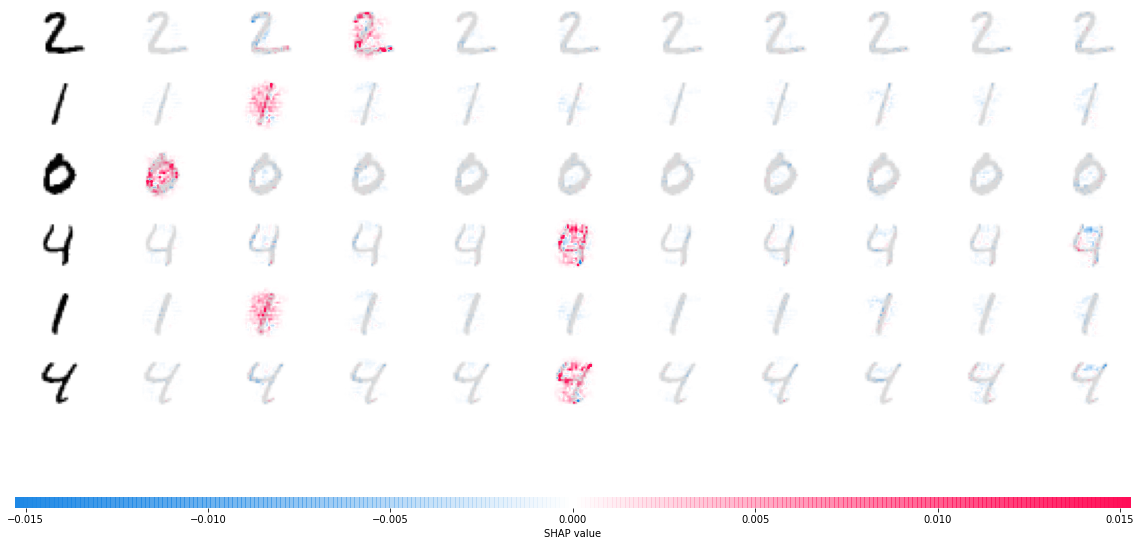

In [21]:
plot_shap(model, x_test, elements=7, population=500)

## Analyze Bad Predictions

### Make predictions
The following code predicts n items out of the test dataset.

In [22]:
compare_items = 10000
prediction = [argmax(x) for x in model.predict(x_test[:compare_items])]
expectation = y_test[:compare_items]

comparison = concat([expectation.rename('actual'), DataFrame(prediction, columns=['prediction'])], axis=1)
missmatch_ids = comparison[comparison.prediction != comparison.actual].index

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


### Take missmatches

In [23]:
missmatches = comparison.iloc[missmatch_ids]
labels = missmatches.prediction.map(str) + " (" + missmatches.actual.map(str) + ")"

### Display missmatches

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


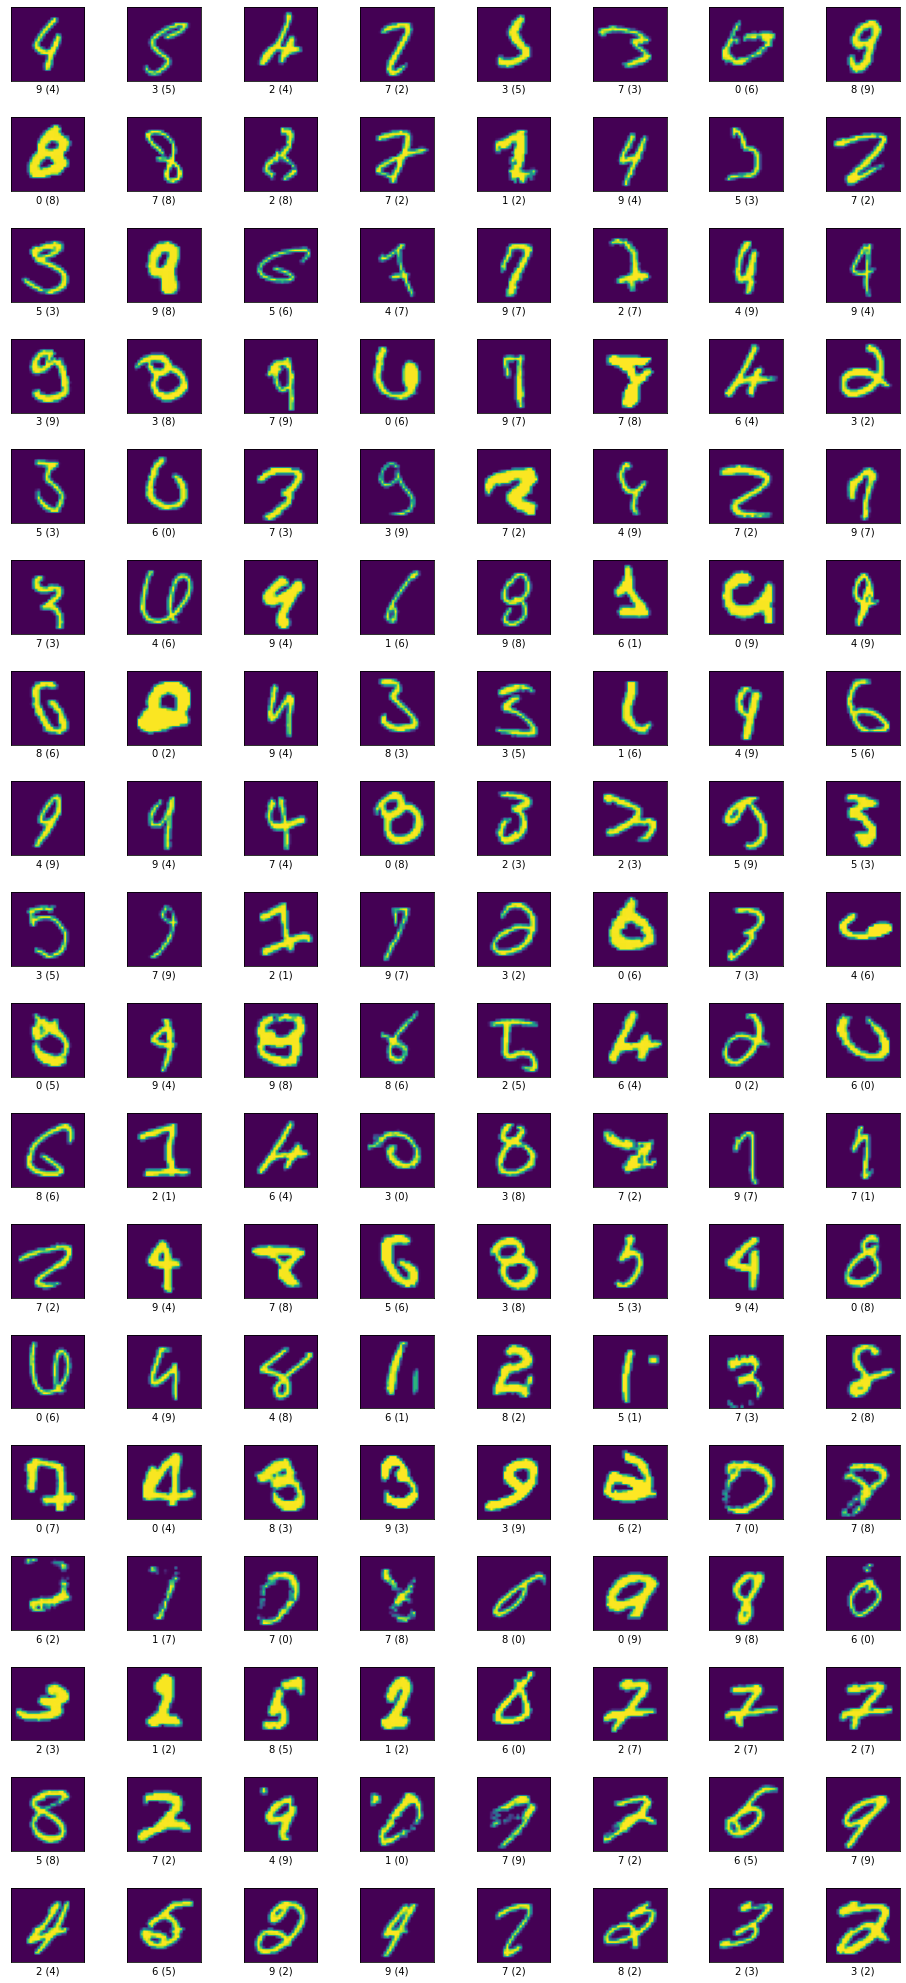

In [24]:
display_dataframe(x_test[missmatch_ids], labels = labels.tolist(), cols=8)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


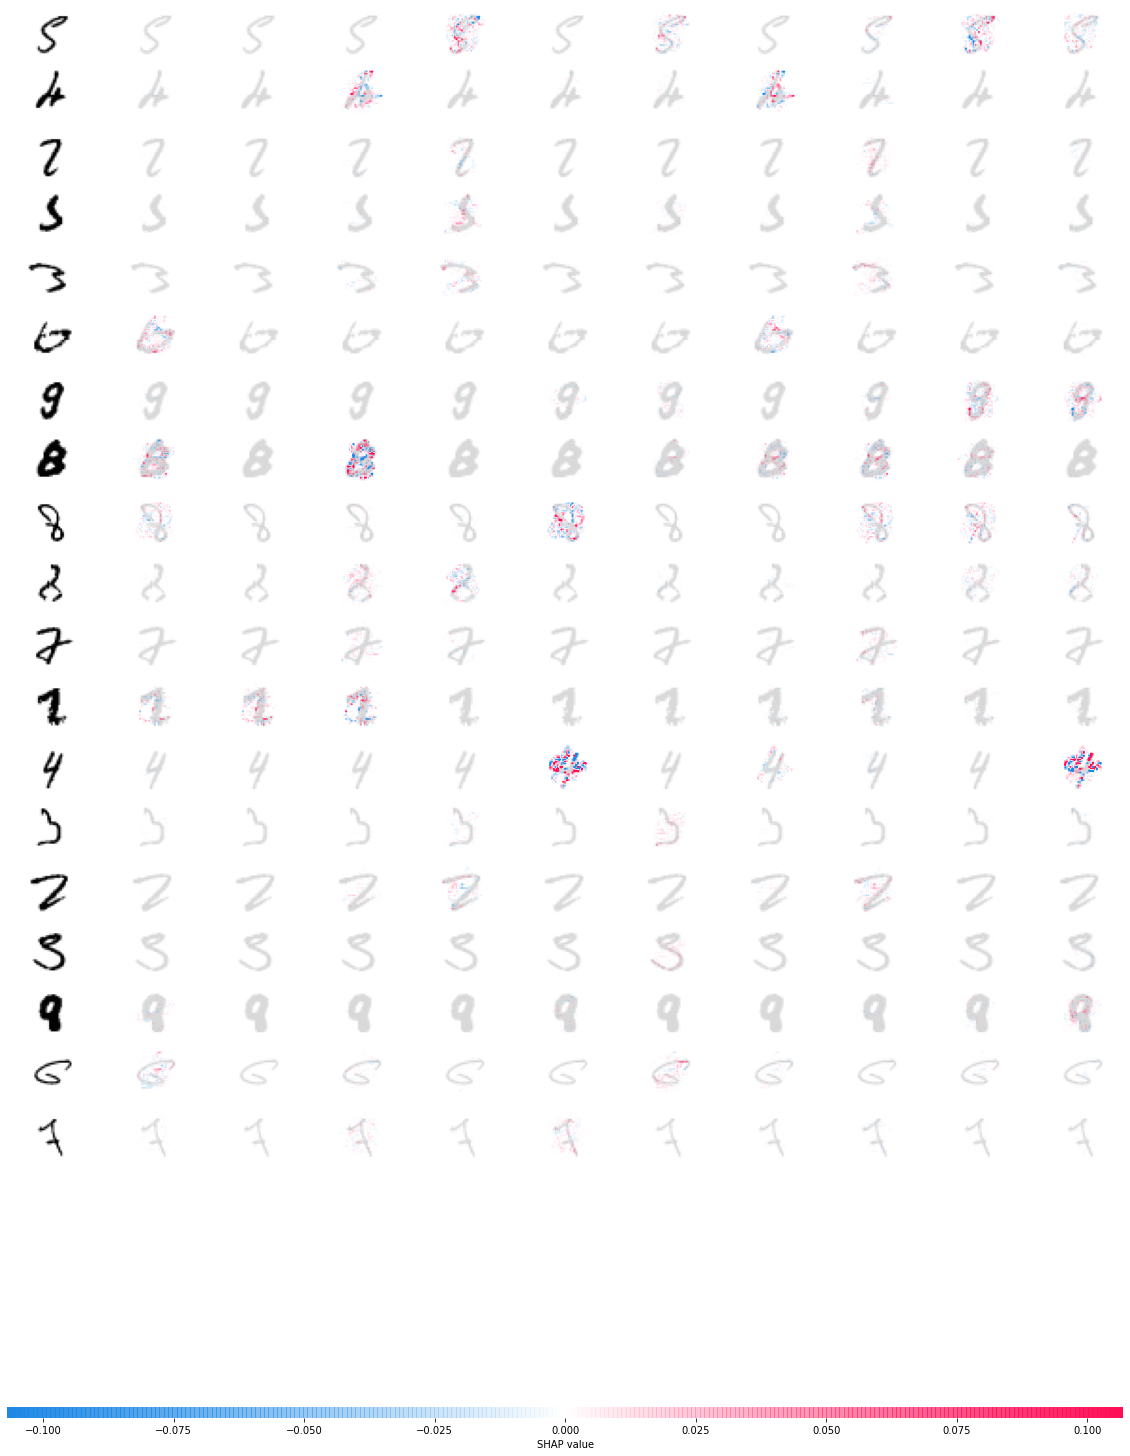

In [25]:
mm = x_test[missmatch_ids]
plot_shap(model, mm, elements=20)